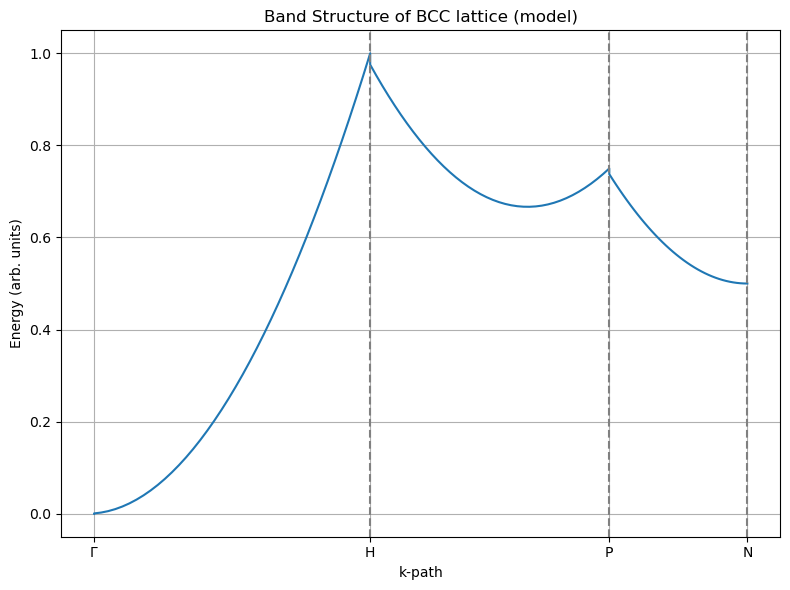

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define high-symmetry points in reciprocal lattice units for bcc
# (assuming a cubic lattice with lattice constant a = 1 for simplicity)
Gamma = np.array([0, 0, 0])
P     = np.array([0.5, 0.5, 0.5])
H     = np.array([1, 0, 0])
N     = np.array([0.5, 0.5, 0])

# Reciprocal lattice vectors for bcc (simple cubic for basic model)
G_vectors = [
    np.array([0, 0, 0]),
    np.array([1, 0, 0]),
    np.array([0, 1, 0]),
    np.array([0, 0, 1]),
    np.array([1, 1, 0]),
    np.array([1, 0, 1]),
    np.array([0, 1, 1]),
    np.array([1, 1, 1]),
]

# Define path and labels
k_points = [Gamma, H, P, N]
labels = [r'$\Gamma$', 'H', 'P', 'N']
path_segments = 40  # number of points between each pair

# Interpolate k-path
k_path = []
k_dist = [0]
for i in range(len(k_points) - 1):
    start, end = k_points[i], k_points[i+1]
    segment = np.linspace(start, end, path_segments, endpoint=False)
    k_path.extend(segment)
    dist = np.linalg.norm(end - start)
    k_dist.extend(np.array(k_dist[-1]) + np.linspace(0, dist, path_segments, endpoint=False))

k_path.append(k_points[-1])
k_dist.append(k_dist[-1] + np.linalg.norm(k_points[-1] - k_points[-2]))
k_path = np.array(k_path)

# Simple tight-binding-like dispersion relation for bcc
def energy(kx, ky, kz, n=0):
    cte = n*2
    return  (kx + cte)**2 + (ky + cte)**2 + (kz + cte)**2

# Compute energies
energies = [energy(k[0], k[1], k[2]) for k in k_path]

# Plot
plt.figure(figsize=(8, 6))
plt.plot(k_dist[:-1], energies, label='Band')
plt.xticks(
    [k_dist[0], k_dist[path_segments], k_dist[2 * path_segments], k_dist[3 * path_segments]],
    labels
)
plt.xlabel("k-path")
plt.ylabel("Energy (arb. units)")
plt.title("Band Structure of BCC lattice (model)")
plt.grid(True)
plt.axvline(x=k_dist[path_segments], color='gray', linestyle='--')
plt.axvline(x=k_dist[2 * path_segments], color='gray', linestyle='--')
plt.axvline(x=k_dist[3 * path_segments], color='gray', linestyle='--')
plt.tight_layout()
plt.show()

